In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

print(housing.feature_names)

X = pd.DataFrame(housing.data, columns=housing.feature_names).drop(columns="AveBedrms")

y = housing.target

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")


Root mean squared error: 0.7362
R-squared: 0.5864


In [20]:
X.shape

(20640, 7)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

parameter_correlation_matrix = X.corr()

high_correlation_features = [(col1, col2, parameter_correlation_matrix.loc[col1, col2])
                     for col1 in parameter_correlation_matrix.columns
                     for col2 in parameter_correlation_matrix.columns
                     if col1 != col2 and abs(parameter_correlation_matrix.loc[col1, col2]) > 0.8]

collinearity_df = pd.DataFrame(high_correlation_features, columns=["Feature 1", "Feature 2", "Correlation"])
print("\nHighly Correlated Features:\n", collinearity_df)

vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVIF for each feature:\n", vif_df)


Highly Correlated Features:
    Feature 1  Feature 2  Correlation
0   Latitude  Longitude    -0.924664
1  Longitude   Latitude    -0.924664

VIF for each feature:
       Feature         VIF
0      MedInc    6.020853
1    HouseAge    7.171601
2    AveRooms    6.832229
3  Population    2.935230
4    AveOccup    1.095009
5    Latitude  533.285550
6   Longitude  578.148994


In [31]:
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficent Value": model.coef_})
coef_df = coef_df.sort_values("Coefficent Value", ascending=False)

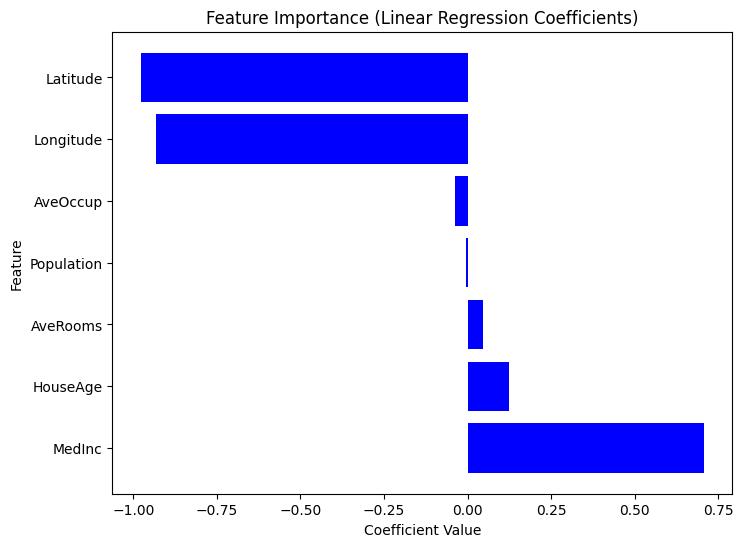

In [33]:
# Sort dataframe by coefficients.


# Create plot.
plt.figure(figsize=(8,6))
plt.barh(coef_df["Feature"], coef_df["Coefficent Value"], color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

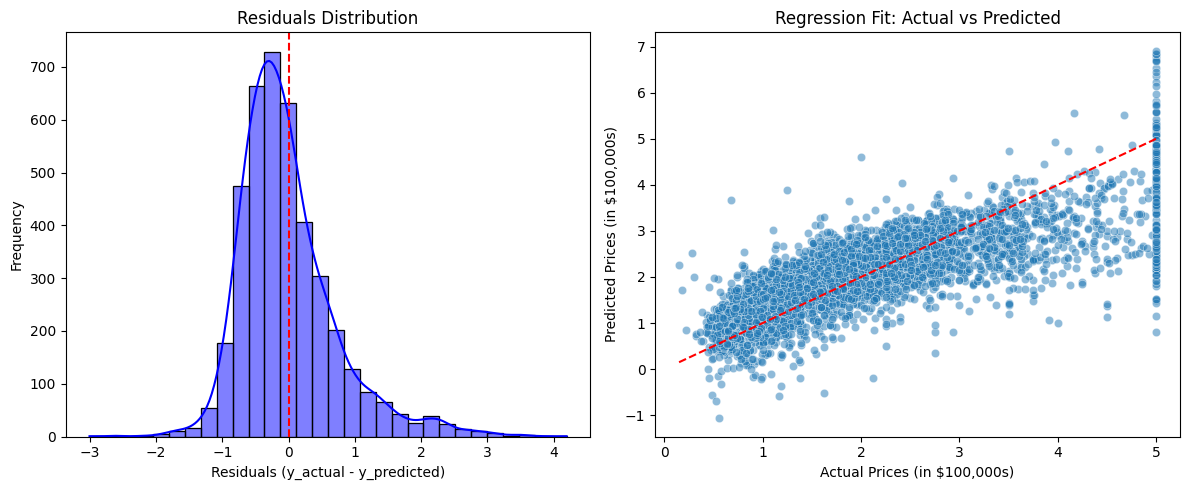

In [35]:
residuals = y_test-y_pred

plt.figure(figsize=(12,5))


# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")


# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Prices (in $100,000s)")
plt.ylabel("Predicted Prices (in $100,000s)")


# Show plots.
plt.tight_layout()
plt.show()